<H1>Deploying a Machine Learning Model Exploratory Data Analysis (EDA)</H1>

<H3>1. Install Packages</H3>

In [1]:
# Import Packages

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


<H3>2. Get Census Data and Read it with Pandas:</H3>

In [2]:
# Load Data into DataFrame

df = pd.read_csv("../data/census.csv")

<H3>3. Explore the Data in the DataFrame</H3>

In [3]:
# Get Basic df Shape

df.shape

(32561, 15)

In [4]:
# Inspect First Five Rows

df.head()

,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Inspect Last Five Rows

df.tail()

,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
# Inspect Column Info Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlgt           32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# Summarize Missing Data

df.isnull().sum()

age               0
workclass         0
fnlgt             0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [8]:
# Inspect Column Statistical Data

df.describe()

,age,fnlgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<H3>4. Graph the Numeric Data in the DataFrame</H3>

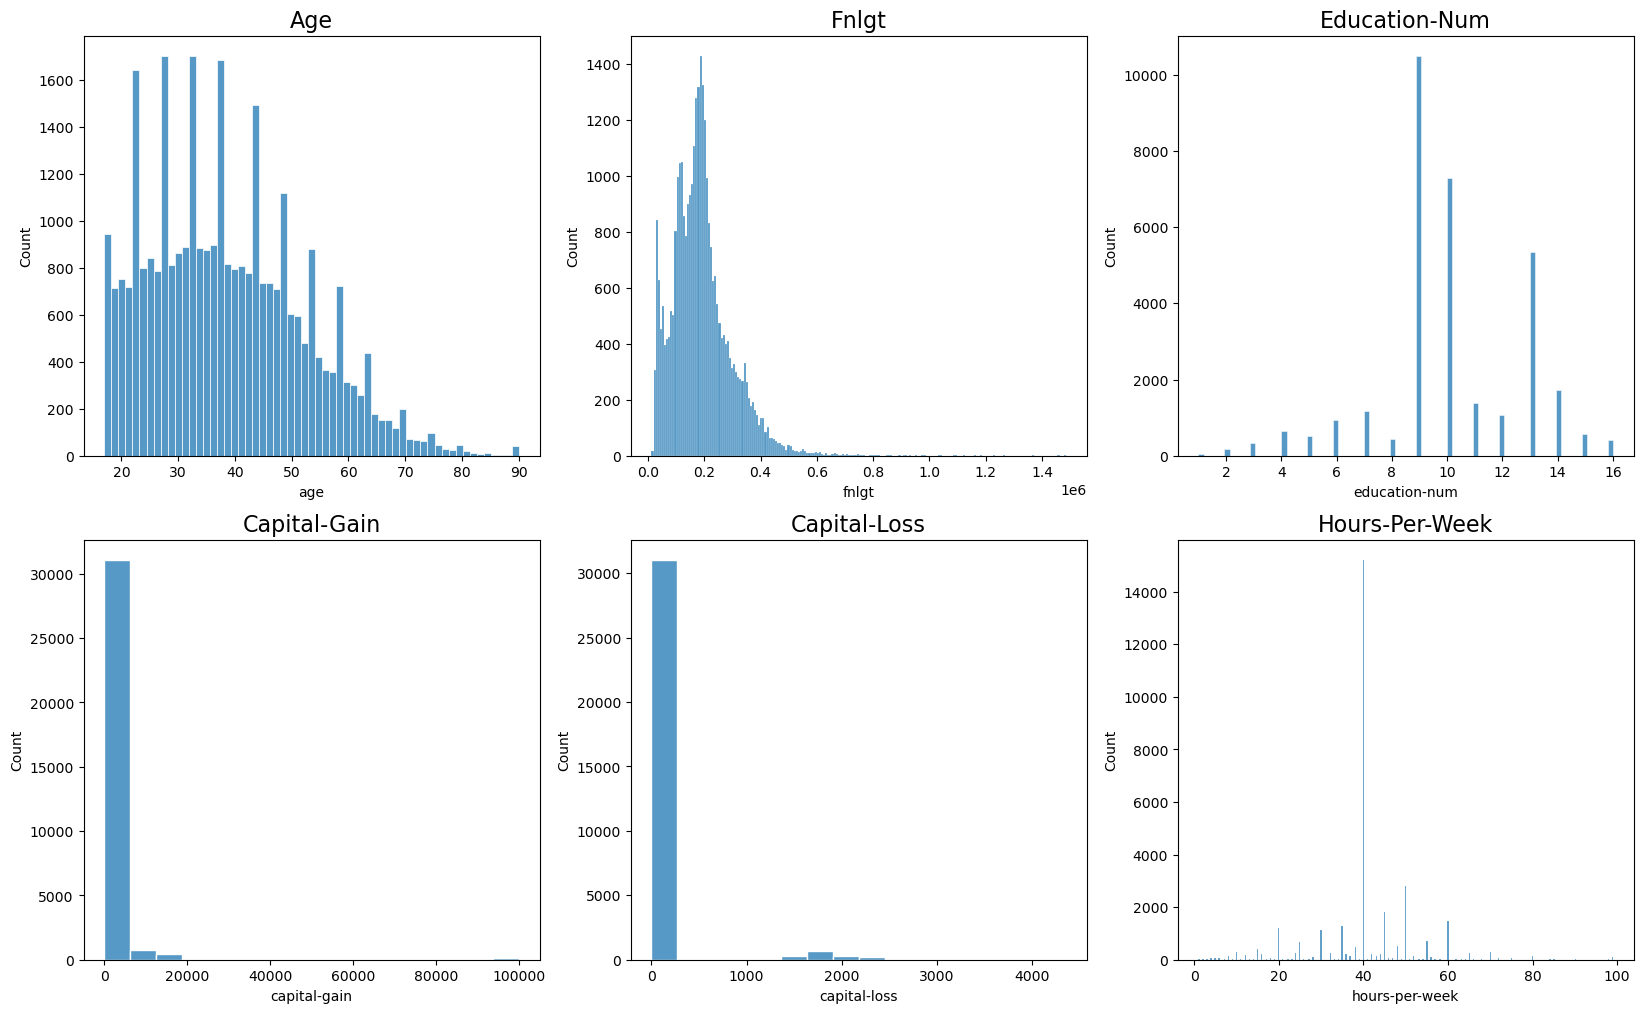

In [9]:
# Create Histogram of Numeric Column Data

# Set Veriables

Data_Columns = [
    'age',
    'fnlgt',
    'education-num',
    'capital-gain',
    'capital-loss',
    'hours-per-week'
]

Columns = 3
Rows = math.ceil(len(Data_Columns)/Columns)

# Create Figure
fig, axes = plt.subplots(Rows, Columns, figsize=(20, 12))
axes = [axes[i][j] for i in range(Rows) for j in range(Columns)]
sns.set_theme(style="dark", palette="dark", color_codes='b')

# Plot Data
for i, col in zip(range(Rows * Columns), Data_Columns):

    # Create Plot
    ax = sns.histplot(data=df, x=col, ax=axes[i])

    # Set Title
    title = col.replace('_', ' ').title()
    ax.set_title(title, fontsize=16)

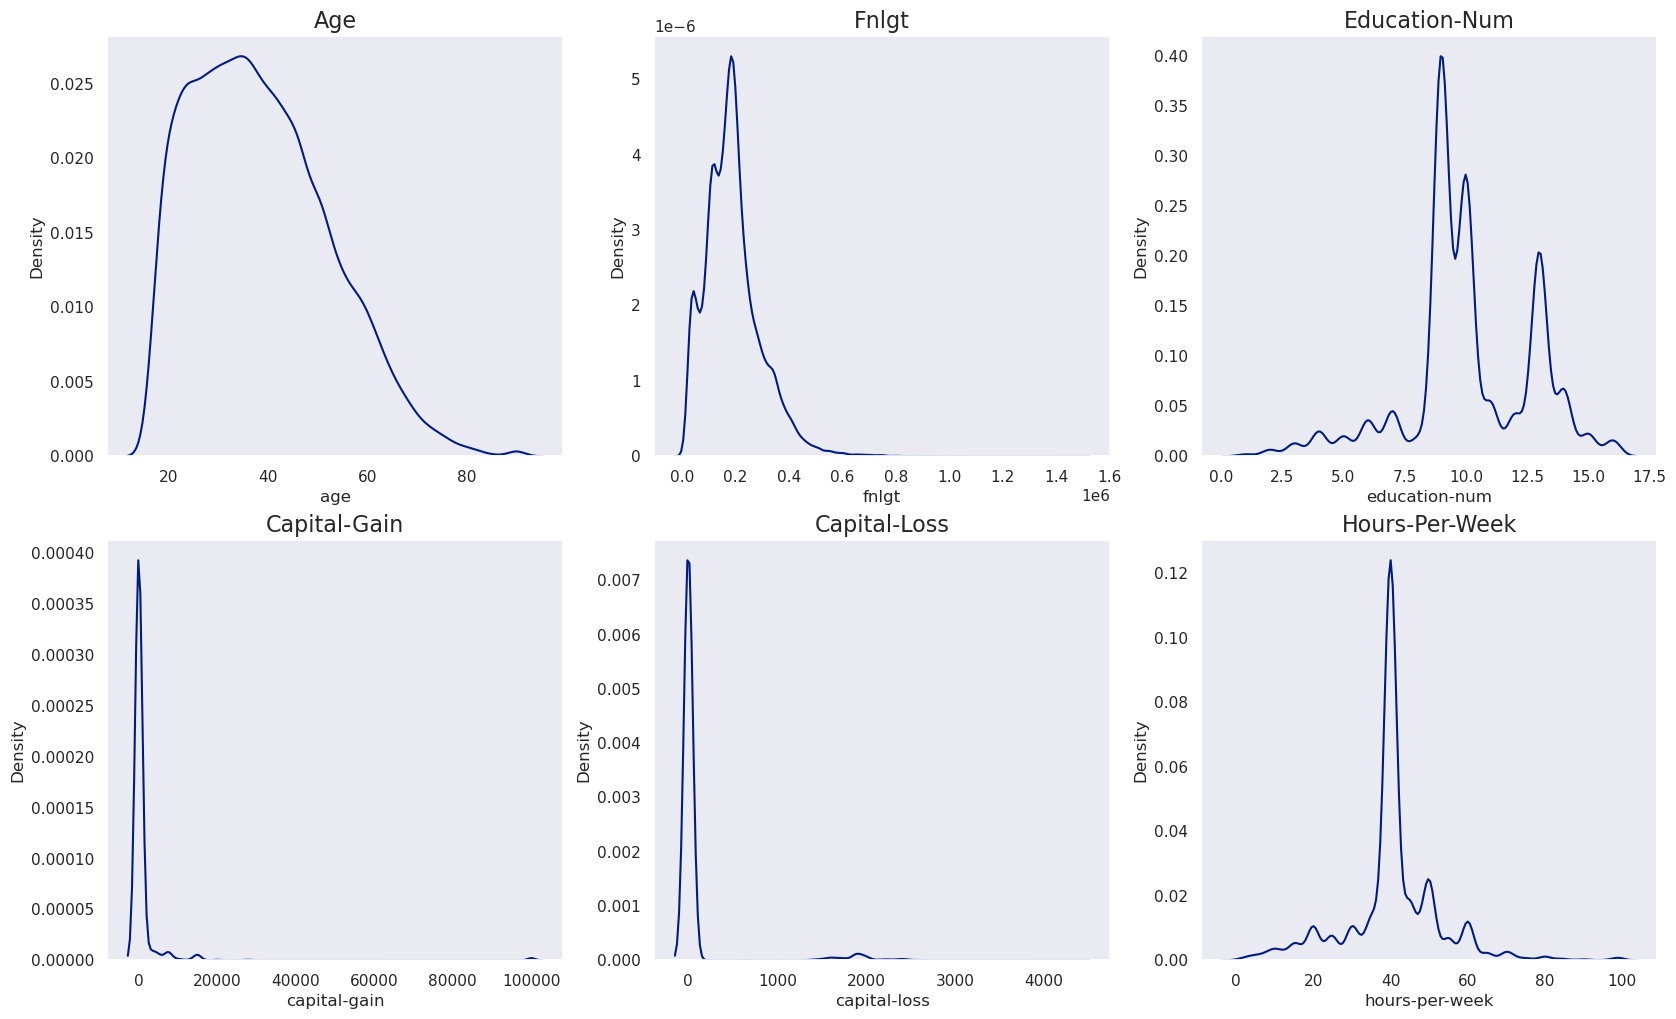

In [10]:
# Create Kernel Density Estimate Plot of Numeric Column Data

# Set Veriables

Data_Columns = [
    'age',
    'fnlgt',
    'education-num',
    'capital-gain',
    'capital-loss',
    'hours-per-week'
]

Columns = 3
Rows = math.ceil(len(Data_Columns)/Columns)

# Create Figure
fig, axes = plt.subplots(Rows, Columns, figsize=(20, 12))
axes = [axes[i][j] for i in range(Rows) for j in range(Columns)]
sns.set_theme(style="darkgrid", palette="dark", color_codes='b')

# Plot Data
for i, col in zip(range(Rows * Columns), Data_Columns):

    # Create Plot
    ax = sns.kdeplot(data=df, x=col, ax=axes[i])

    # Set Title
    title = col.replace('_', ' ').title()
    ax.set_title(title, fontsize=16)

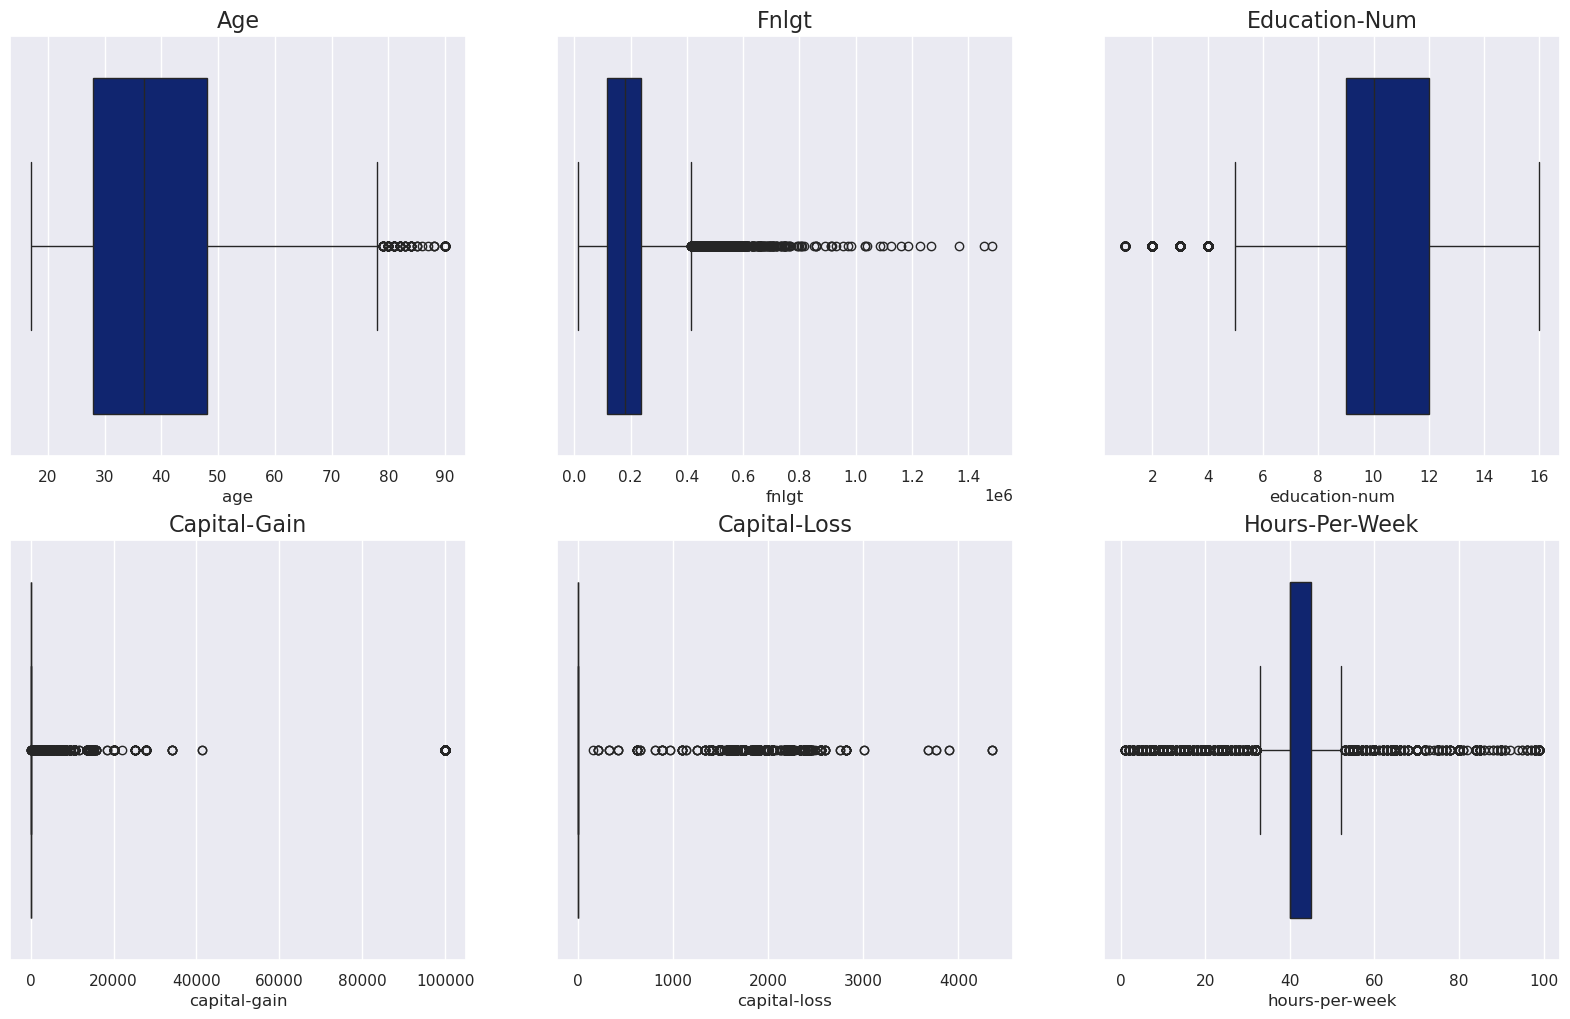

In [11]:
# Create Boxplot of Numeric Column Data

# Set Veriables

Data_Columns = [
    'age',
    'fnlgt',
    'education-num',
    'capital-gain',
    'capital-loss',
    'hours-per-week'
]

Columns = 3
Rows = math.ceil(len(Data_Columns)/Columns)

# Create Figure
fig, axes = plt.subplots(Rows, Columns, figsize=(20, 12))
axes = [axes[i][j] for i in range(Rows) for j in range(Columns)]
sns.set_theme(style="dark", palette="dark", color_codes='b')

# Plot Data
for i, col in zip(range(Rows * Columns), Data_Columns):

    # Create Plot
    ax = sns.boxplot(data=df, x=col, ax=axes[i])

    # Set Title
    title = col.replace('_', ' ').title()
    ax.set_title(title, fontsize=16)

<H3>4. Graph the Categorical Data in the DataFrame</H3>

In [12]:
# Check Workclass Values

df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

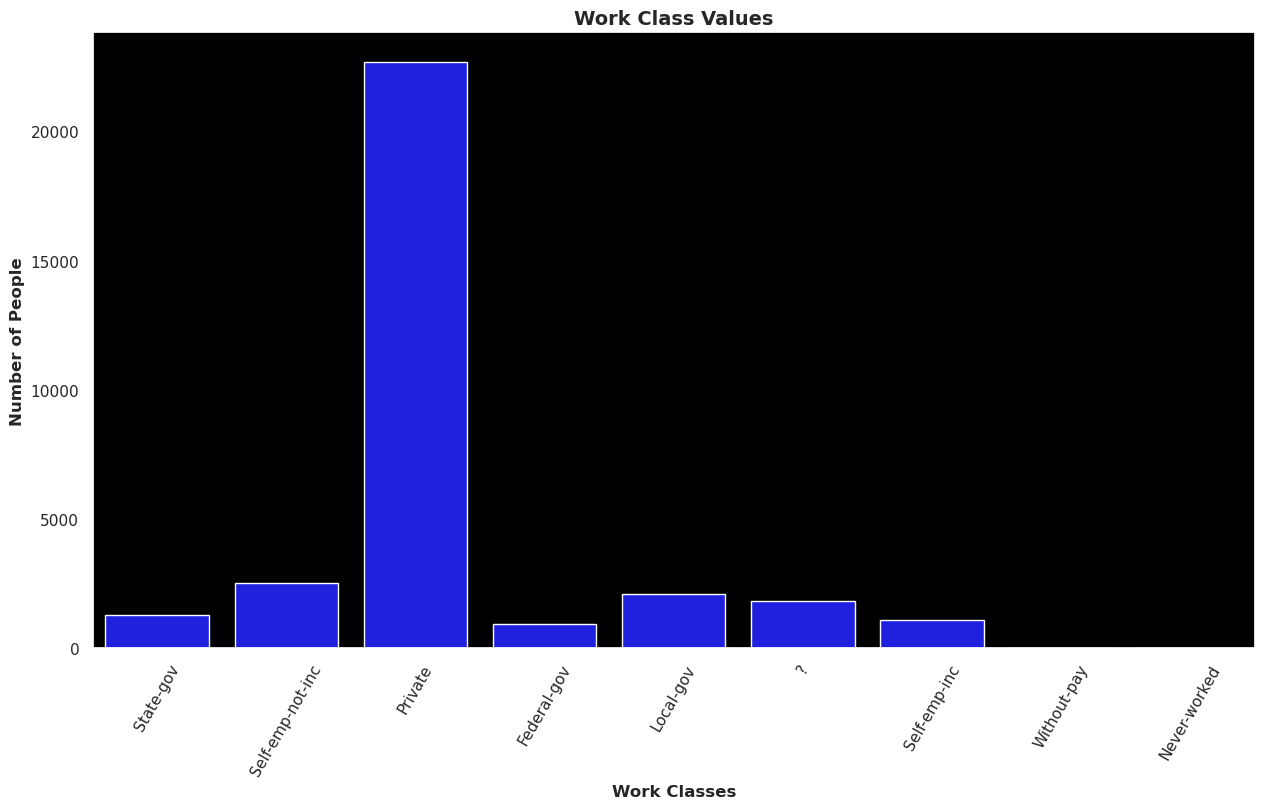

In [13]:
# Plot Workclass Values

plt.figure(figsize = [15, 8])
plt.rcParams['axes.facecolor'] = 'Black'

data = df

# Bar Chart of Values 
sns.countplot(data = data, x = 'workclass', color='Blue')
plt.xticks(rotation = 60)


plt.title('Work Class Values', fontsize=14, fontweight='bold')
plt.xlabel('Work Classes', fontsize=12, fontweight='bold')
plt.ylabel('Number of People', fontsize=12, fontweight='bold');

In [14]:
# Check Education Values

df['education'].value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

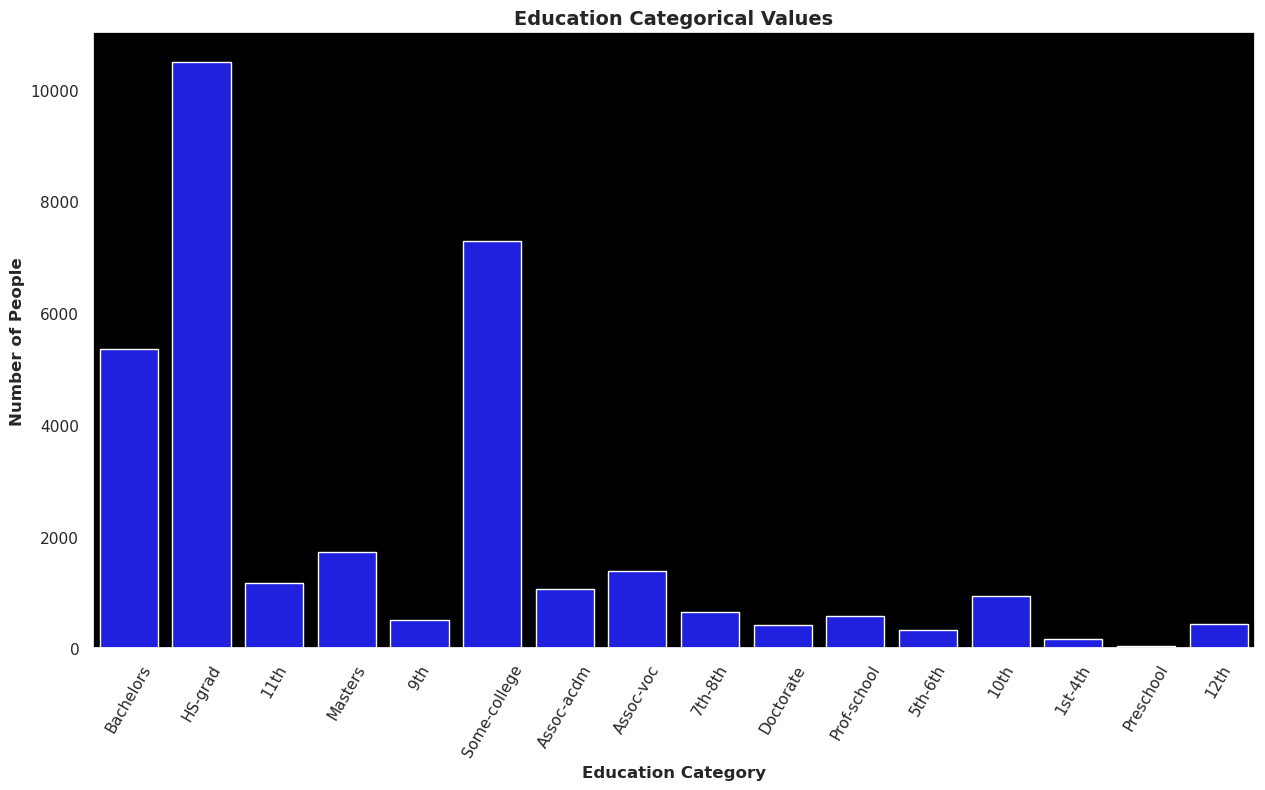

In [15]:
# Plot Education Values

plt.figure(figsize = [15, 8])
plt.rcParams['axes.facecolor'] = 'Black'

data = df

# Bar Chart of Values 
sns.countplot(data = data, x = 'education', color='Blue')
plt.xticks(rotation = 60)


plt.title('Education Categorical Values', fontsize=14, fontweight='bold')
plt.xlabel('Education Category', fontsize=12, fontweight='bold')
plt.ylabel('Number of People', fontsize=12, fontweight='bold');

In [16]:
# Check Marital Status Values

df['marital-status'].value_counts()

marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

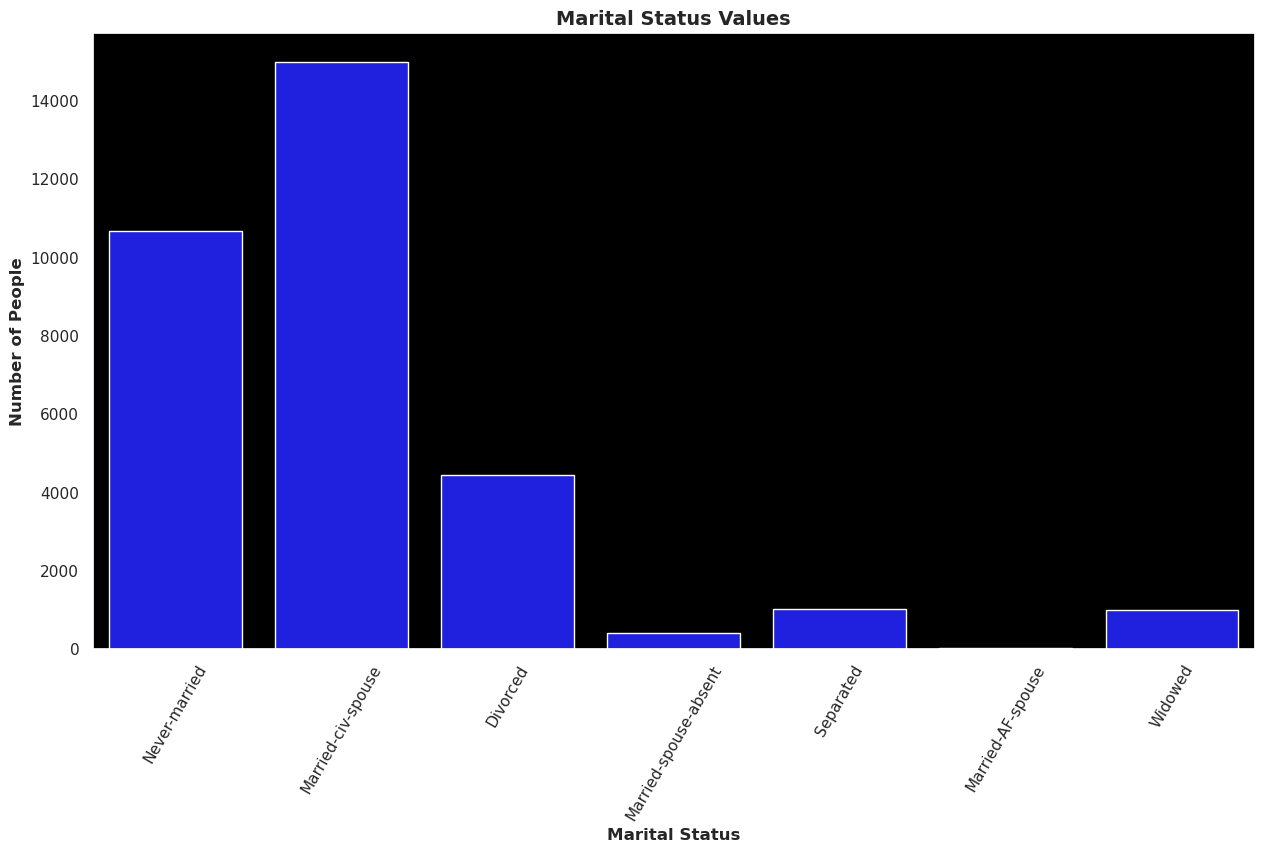

In [17]:
# Plot Marital Status Values

plt.figure(figsize = [15, 8])
plt.rcParams['axes.facecolor'] = 'Black'

data = df

# Bar Chart of Values 
sns.countplot(data = data, x = 'marital-status', color='Blue')
plt.xticks(rotation = 60)


plt.title('Marital Status Values', fontsize=14, fontweight='bold')
plt.xlabel('Marital Status', fontsize=12, fontweight='bold')
plt.ylabel('Number of People', fontsize=12, fontweight='bold');

In [18]:
# Check Occupation Values

df['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

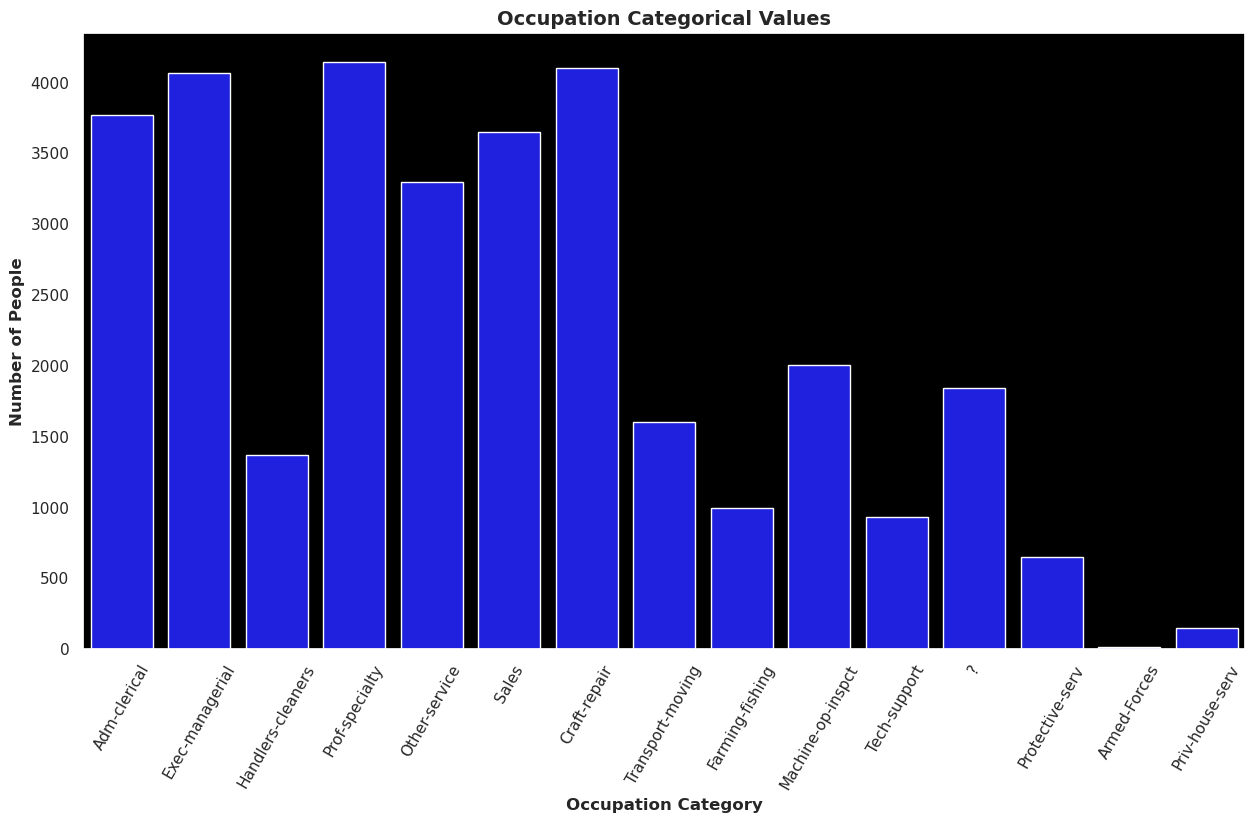

In [19]:
# Plot Occupation Values

plt.figure(figsize = [15, 8])
plt.rcParams['axes.facecolor'] = 'Black'

data = df

# Bar Chart of Values 
sns.countplot(data = data, x = 'occupation', color='Blue')
plt.xticks(rotation = 60)


plt.title('Occupation Categorical Values', fontsize=14, fontweight='bold')
plt.xlabel('Occupation Category', fontsize=12, fontweight='bold')
plt.ylabel('Number of People', fontsize=12, fontweight='bold');

In [20]:
# Check Relationship Values

df['relationship'].value_counts()

relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

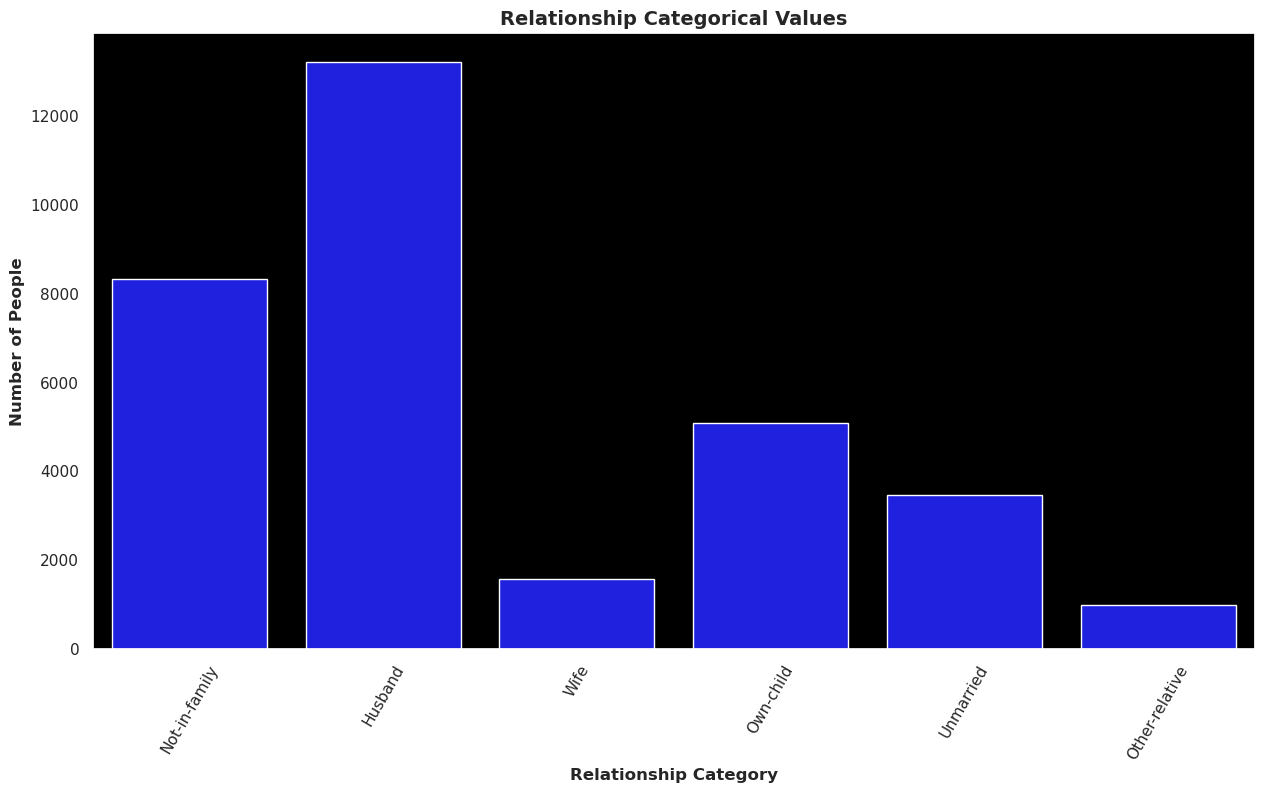

In [21]:
# Plot Relationship Values

plt.figure(figsize = [15, 8])
plt.rcParams['axes.facecolor'] = 'Black'

data = df

# Bar Chart of Values 
sns.countplot(data = data, x = 'relationship', color='Blue')
plt.xticks(rotation = 60)


plt.title('Relationship Categorical Values', fontsize=14, fontweight='bold')
plt.xlabel('Relationship Category', fontsize=12, fontweight='bold')
plt.ylabel('Number of People', fontsize=12, fontweight='bold');

In [22]:
# Check Race Values

df['race'].value_counts()

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

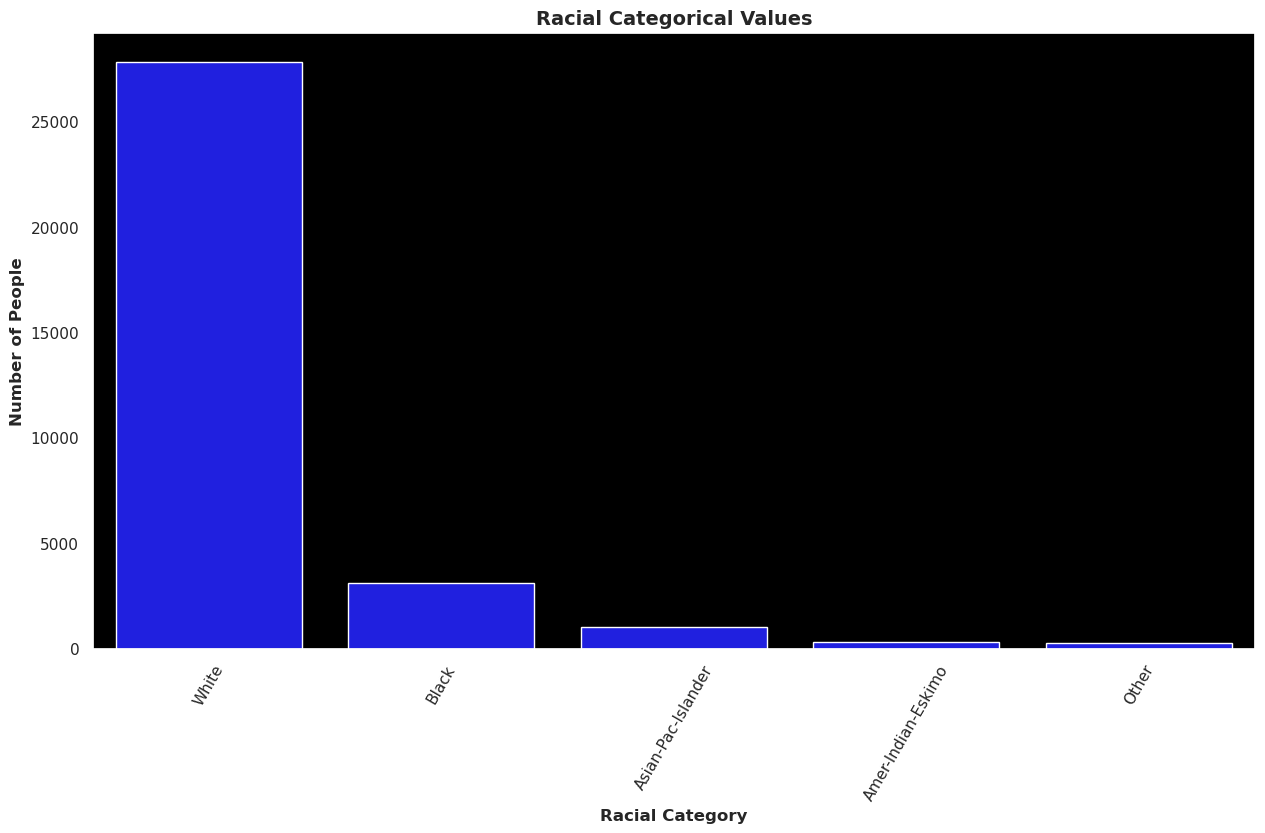

In [23]:
# Plot Race Values

plt.figure(figsize = [15, 8])
plt.rcParams['axes.facecolor'] = 'Black'

data = df

# Bar Chart of Values 
sns.countplot(data = data, x = 'race', color='Blue')
plt.xticks(rotation = 60)


plt.title('Racial Categorical Values', fontsize=14, fontweight='bold')
plt.xlabel('Racial Category', fontsize=12, fontweight='bold')
plt.ylabel('Number of People', fontsize=12, fontweight='bold');

In [24]:
# Check Sex Values

df['sex'].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

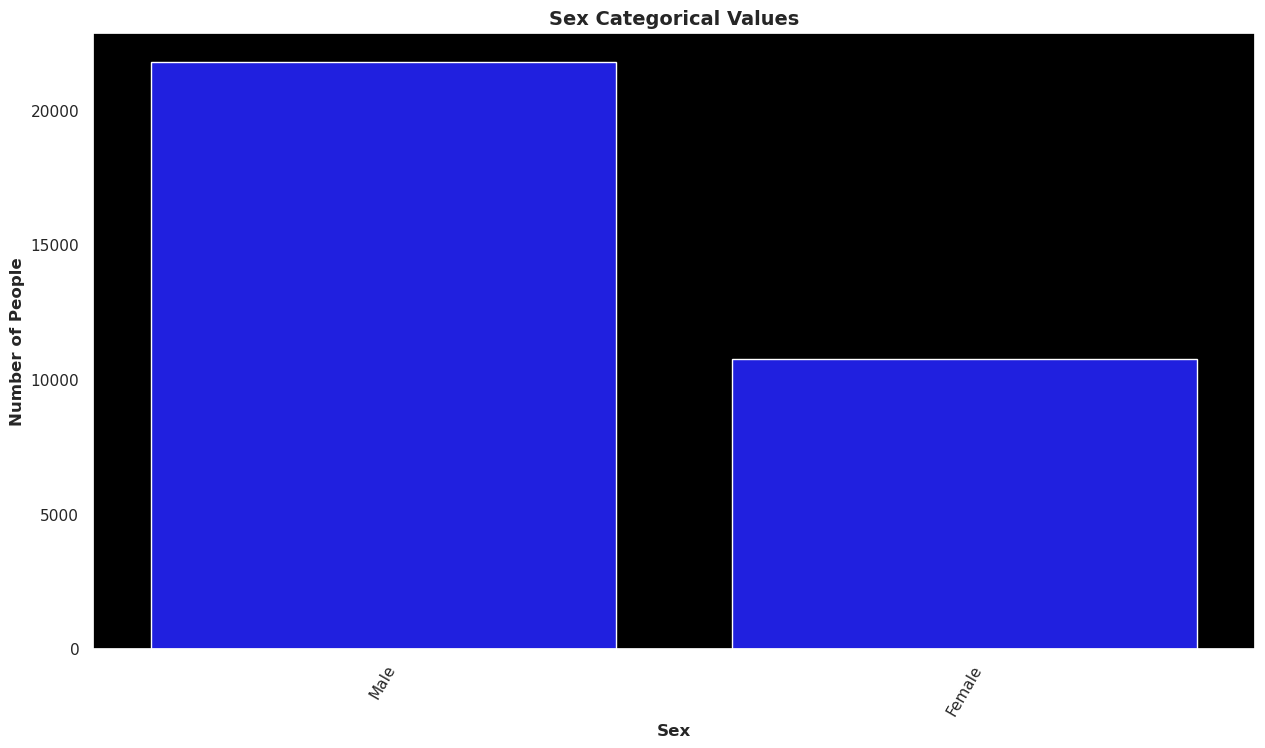

In [25]:
# Plot Sex Values

plt.figure(figsize = [15, 8])
plt.rcParams['axes.facecolor'] = 'Black'

data = df

# Bar Chart of Values 
sns.countplot(data = data, x = 'sex', color='Blue')
plt.xticks(rotation = 60)


plt.title('Sex Categorical Values', fontsize=14, fontweight='bold')
plt.xlabel('Sex', fontsize=12, fontweight='bold')
plt.ylabel('Number of People', fontsize=12, fontweight='bold');

In [26]:
# Check Native Country Values

df['native-country'].value_counts()

native-country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

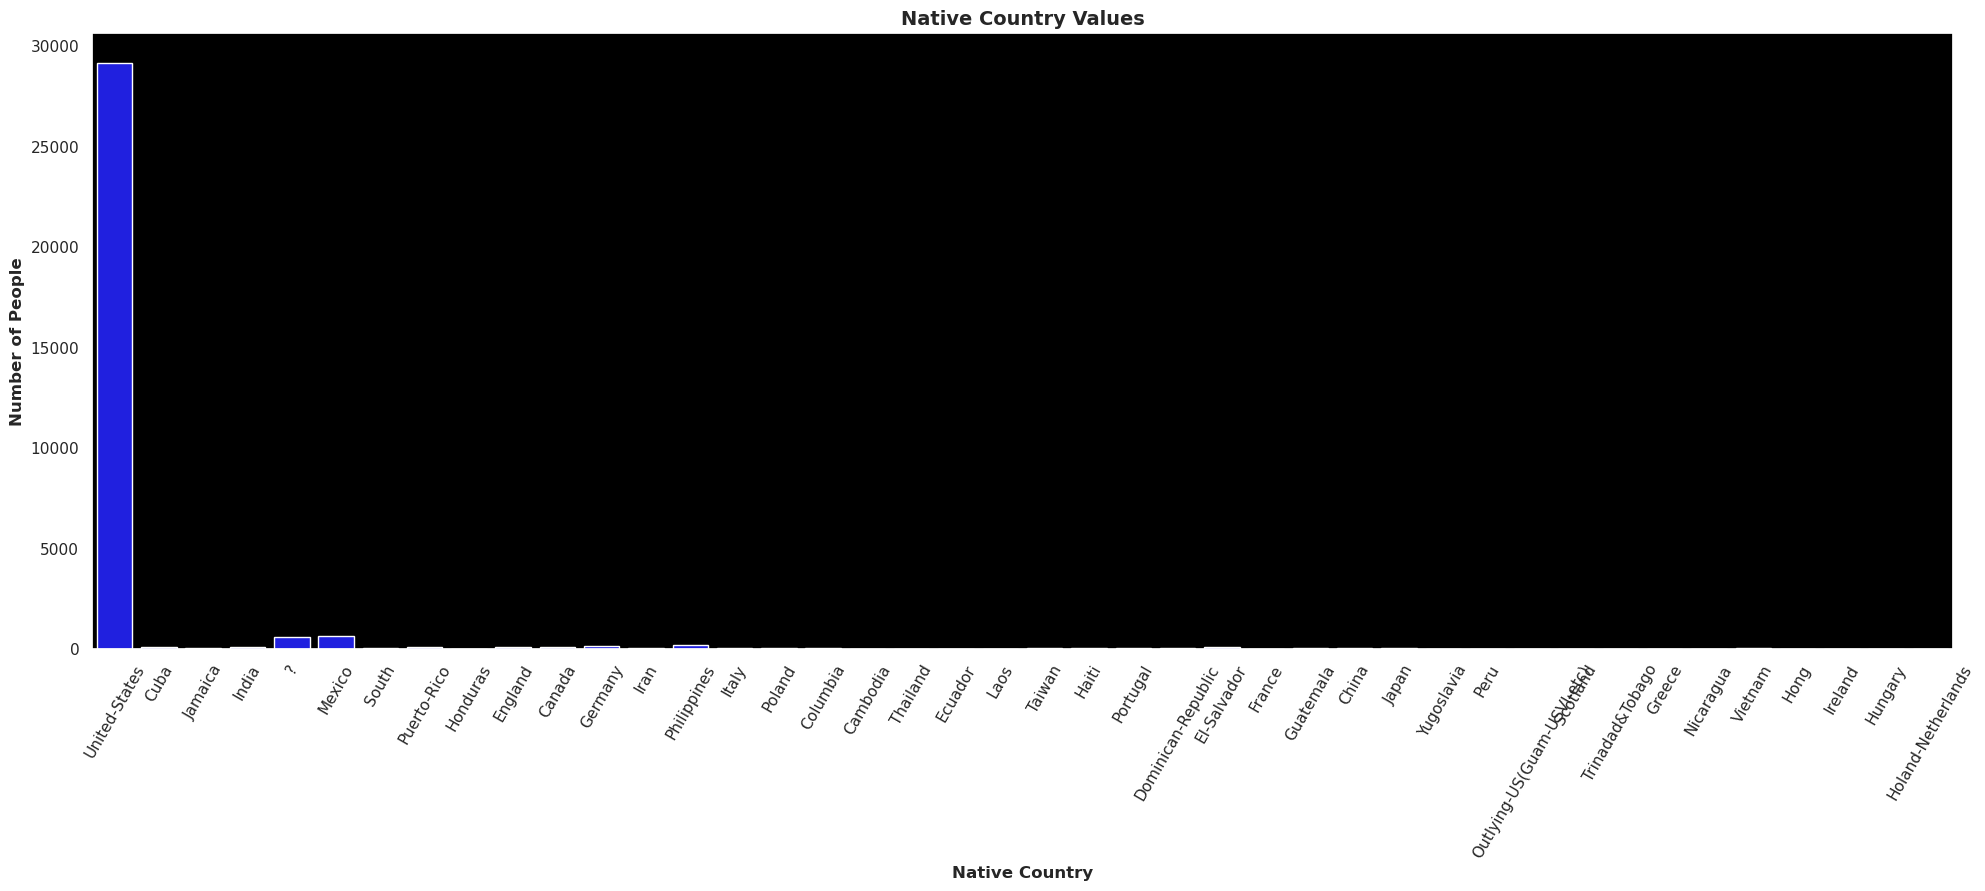

In [27]:
# Plot Native Country Values

plt.figure(figsize = [24, 8])
plt.rcParams['axes.facecolor'] = 'Black'

data = df

# Bar Chart of Values 
sns.countplot(data = data, x = 'native-country', color='Blue')
plt.xticks(rotation = 60)


plt.title('Native Country Values', fontsize=14, fontweight='bold')
plt.xlabel('Native Country', fontsize=12, fontweight='bold')
plt.ylabel('Number of People', fontsize=12, fontweight='bold');

In [28]:
# Check Salary Values

df['salary'].value_counts()

salary
<=50K    24720
>50K      7841
Name: count, dtype: int64

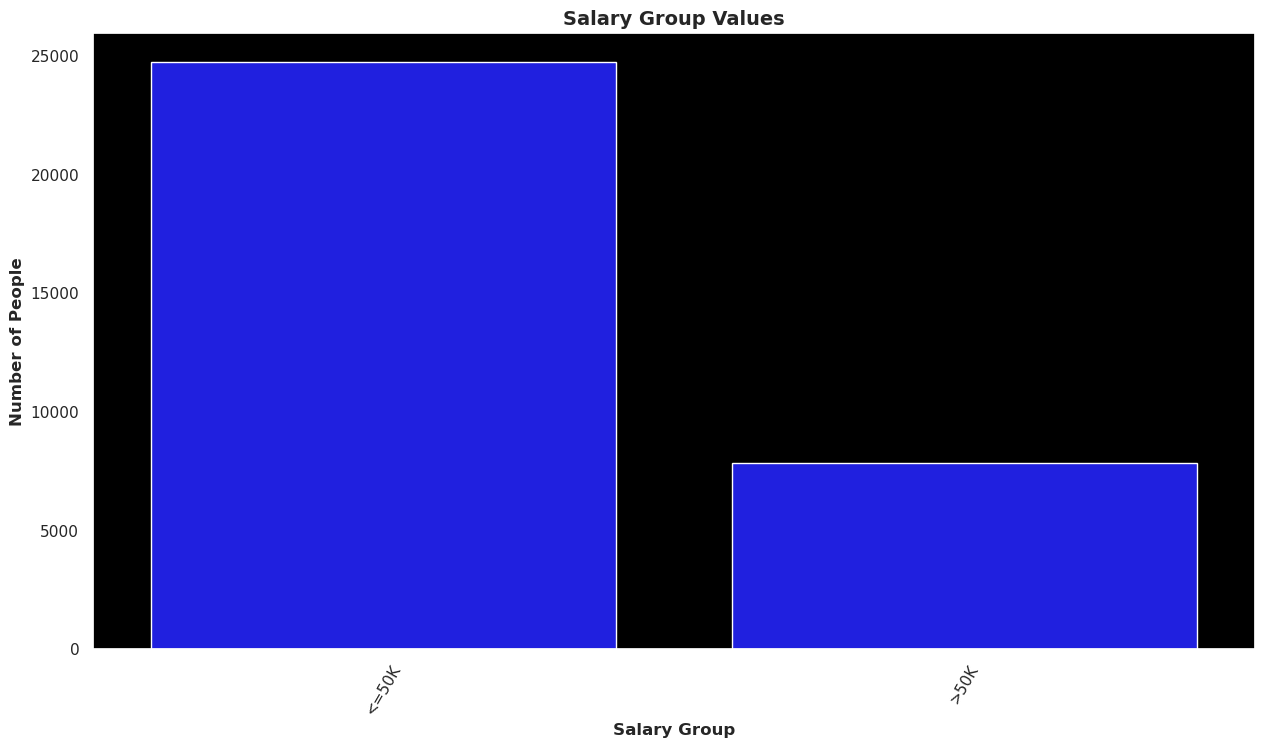

In [29]:
# Plot Salary Values

plt.figure(figsize = [15, 8])
plt.rcParams['axes.facecolor'] = 'Black'

data = df

# Bar Chart of Values 
sns.countplot(data = data, x = 'salary', color='Blue')
plt.xticks(rotation = 60)


plt.title('Salary Group Values', fontsize=14, fontweight='bold')
plt.xlabel('Salary Group', fontsize=12, fontweight='bold')
plt.ylabel('Number of People', fontsize=12, fontweight='bold');

<H3>5. Explore Data Slices</H3>

In [30]:

cat_features = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
]

for col in cat_features:
    # iterate through the unique values in one categorical feature
    for slicevalue in sorted(df[col].unique()):
        df_slice = df[df[col] == slicevalue]
        count = df_slice.shape[0]
        print(f"{col}: {slicevalue}, Count: {count}")


workclass: ?, Count: 1836
workclass: Federal-gov, Count: 960
workclass: Local-gov, Count: 2093
workclass: Never-worked, Count: 7
workclass: Private, Count: 22696
workclass: Self-emp-inc, Count: 1116
workclass: Self-emp-not-inc, Count: 2541
workclass: State-gov, Count: 1298
workclass: Without-pay, Count: 14
education: 10th, Count: 933
education: 11th, Count: 1175
education: 12th, Count: 433
education: 1st-4th, Count: 168
education: 5th-6th, Count: 333
education: 7th-8th, Count: 646
education: 9th, Count: 514
education: Assoc-acdm, Count: 1067
education: Assoc-voc, Count: 1382
education: Bachelors, Count: 5355
education: Doctorate, Count: 413
education: HS-grad, Count: 10501
education: Masters, Count: 1723
education: Preschool, Count: 51
education: Prof-school, Count: 576
education: Some-college, Count: 7291
marital-status: Divorced, Count: 4443
marital-status: Married-AF-spouse, Count: 23
marital-status: Married-civ-spouse, Count: 14976
marital-status: Married-spouse-absent, Count: 418
